<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** José Pablo Jimenez Mendoza, Enrique Jair Rodríguez Orozco y Daniel Orozco Gómez

**Fecha:** 18 de Abril del 2023.

**Expediente** : 733762, 727454 y 728143.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Kike14/ProyectoConjunto_EJRodriguez_DOrozco_JPJimenez

# Proyecto TEMA-2

___

## NFL: SuperBowl Prediction
>En este proyecto, buscaremos a través de la simulación ver la posibilidad de que un equipo de la NFL llegue a la final de la competición, o sea, al superbowl. Esto lo haremos mediante 4 distintas variables significativas que mide que tanto afectan variables ajenas a las estrategias de un partido, el desempeño del equipo a lo largo de la temporada y en el desempeño en los playoffs. Con esto nos referimos a la cantidad de viento que hacía en un determinado lugar, la cantidad de puntos que se lograron hacer a lo largo de la temporada como local, la cantidad de puntos que se lograron hacer a lo largo de la temporada como visitante y la cantidad de puntos tanto como de visitante, como de local, en la fase final de la NFL. 

## 1.2 Objetivos.
> ### Objetivo general: Estimar una probabilidad que tiene un equipo de llegar al Superbowl mediante las variables obtenidas.

> ### Objetivos específicos:  
>1. Encontrar la correlación del viento con la cantidad de puntos por partido y evaluar su influencia en el juego.
2. Encontrar la media de puntos que debe de hacer un equipo para ganar como local.
3. Encontrar la media de puntos que debe de hacer un equipo para ganar como visitante.
4. Encontrar la media de puntos que debe de hacer un equipo para ganar un partido de playoffs.


## 1.3 Definición del problema.
> El escenario a modelar es la temporada regular y la fase final de la NFL. Este modelado, junto con las variables seleccionadas, nos ayudará a identificar la probabilidad de que un equipo determinado gane el superbowl. Será de mucha utilidad porque el fútbol americano es un deporte que puede cambiar mucho en muy poco.

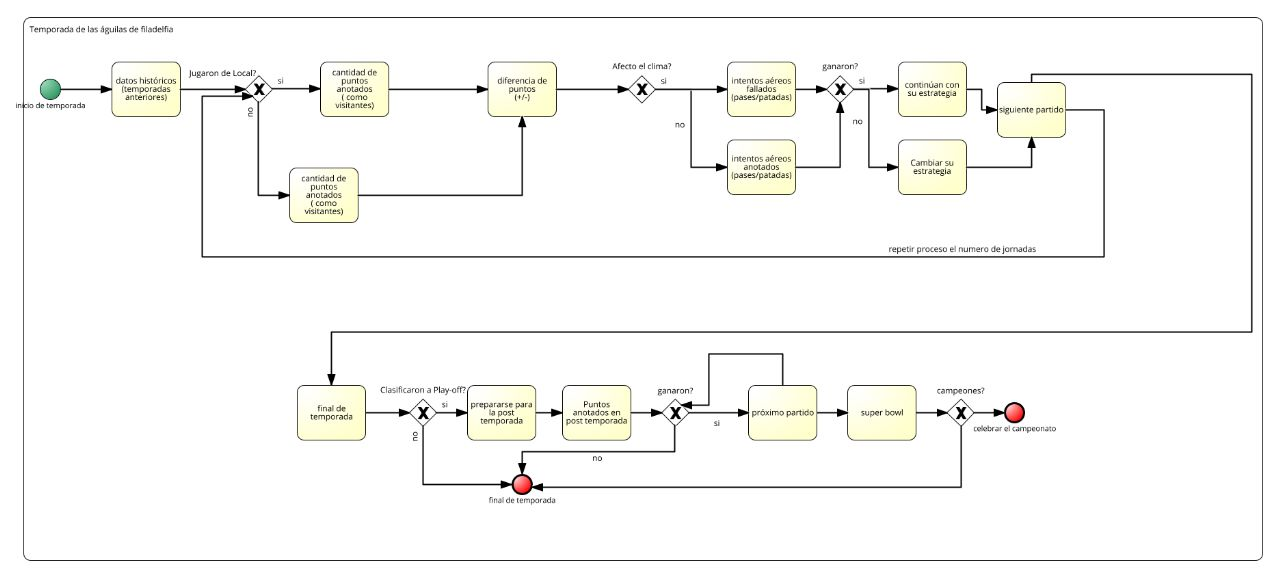

## 1.4 Nodos y variables que se decidieron simular y porqué


>1. Cantidad de viento (en mph) que hacía en determinada zona geográfica: En relación con los puntos en la NFL, los pases son de vital importancia para seguir ganando yardas a lo largo del terreno de juego para poder marcar, pero a estos pases los afectan situaciones externas como el viento, incluso, este último antes mencionado, afecta directamente a una jugada de gol, como sería el gol del campo, a la hora de que el pateador tiene esta oportunidad de sumar puntos, el viento influye en la trayectoria del balón.
2. Puntos marcados por un equipo determinado como local: en un deporte, los puntos son el feature principal para determinar el rendimiento real de un equipo (un equipo puede jugar mal y aún así ganar) y como bien sabemos, influye mucho el hecho de jugar en casa o no.
3. Puntos marcados por un equipo como visitante: en un deporte, los puntos son el feature principal para determinar el rendimiento real de un equipo (un equipo puede jugar mal y aún así ganar) y como bien sabemos, influye mucho el hecho de jugar en casa o no.
4. Puntos marcados por un equipo en playoffs: El rendimiento de un equipo es muy diferente en la temporada regular que en los playoffs y esto está comprobado empíricamente, por lo que puedes hacer muy buena temporada y al final quedarte en el camino.


## 1.5 Supuestos e Hipotesis.

>#### Supuestos
1. Las reglas bases de la NFL y el fútbol americano siguen vigentes.
2. La tecnología usada sigue siendo la misma.
3. No existen cambios en la identidad de los equipos.
4. Consideramos una determinada ventana de tiempo a lo largo del modelo.

>#### Hipótesis
1. El viento tiene una correlación negativa con los puntos que se anotan de local.

## 1.6 Obtención de bases de datos
> Nuestra fuente de datos principal será kaggle de la mano de datos oficiales mostrados en la página de la NFL.

## Simulaciones.

In [52]:
### Librerias
import pandas as pd
import numpy as np
import scipy.stats as st     
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from scipy import optimize

from scipy import stats
from scipy.stats import pearsonr

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

from sklearn.model_selection import GridSearchCV
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
#### Obtención de datos
home_data = pd.read_excel('Datos Nodos.xlsx', sheet_name = 'Home Pats', index_col = 0)
away_data = pd.read_excel('Datos Nodos.xlsx', sheet_name = 'Away Pats', index_col = 0)
POP_data = pd.read_excel('Datos Nodos.xlsx', sheet_name = 'POP')
W_data = pd.read_excel('Datos Nodos.xlsx', sheet_name = 'WW')
hd = home_data['score_home']
ad = away_data['score_away']
ww = W_data['weather_wind_mph']
pop = POP_data['Points']

### Histograma de frecuencia de datos para los 4 nodos

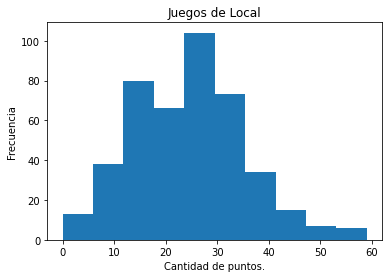

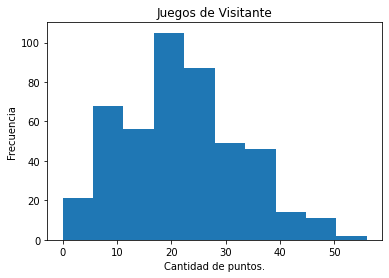

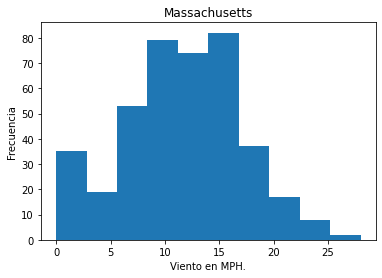

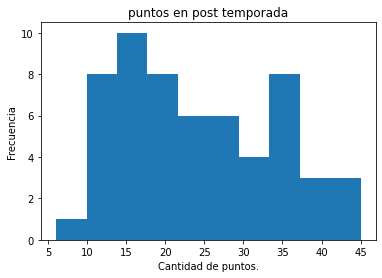

In [4]:
plt.hist(hd)
plt.xlabel('Cantidad de puntos.')
plt.ylabel('Frecuencia')
plt.title('Juegos de Local')
plt.show()

plt.hist(ad)
plt.xlabel('Cantidad de puntos.')
plt.ylabel('Frecuencia')
plt.title('Juegos de Visitante')
plt.show()

plt.hist(ww)
plt.xlabel('Viento en MPH.')
plt.ylabel('Frecuencia')
plt.title('Massachusetts')
plt.show()

plt.hist(pop)
plt.xlabel('Cantidad de puntos.')
plt.ylabel('Frecuencia')
plt.title('puntos en post temporada')
plt.show()


### Correlación entre los puntos anotados en casa para los Patriotas y el viento que hacía en la ciudad.

In [59]:
r, p = stats.pearsonr(ww,hd[0:406])
print(f"Correlación Pearson: r={r}, p-value={p}")


Correlación Pearson: r=-0.19026275655264493, p-value=0.00011471269103142095


**Podemos observar que tiene una correlación negativa, es decir, que entre más viento haga, menos puntos se anotaran.**

### Buscando distribución óptima para nodo 1 (hd)

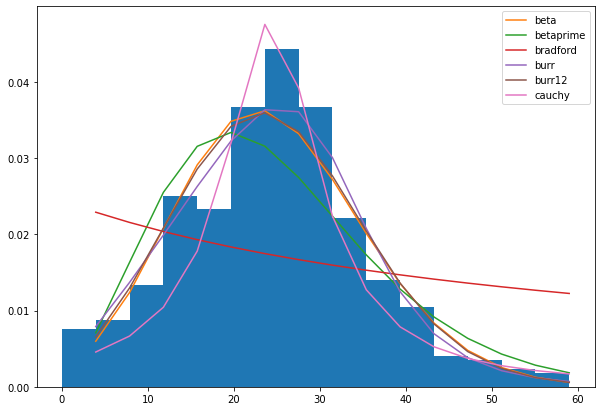

,distribución,error
0,beta,0.00003
1,betaprime,0.00006
2,bradford,0.000169
3,burr,0.000019
4,burr12,0.000028
5,cauchy,0.000044


In [5]:
#Buscando distribuciones para hd
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(hd, bins = 15, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(hd)
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

Vemos que la distibución beta es la que tiene el menor error. Para comprobar que esa distribución se ajusta a nuestros datos, haremos una prueba de hipótesis utilizando una prueba de Kolmogorov-Smirnov.

**Distribución beta**

**Formulación de hipótesis**

$H_{0}$: Nuestro conjunto de datos tienen una distribución beta.

$H_{a}$: Nuestro conjunto de datos no sigue una distribución beta.

**Plan de análisis.**

Para este análisis nuestro nivel de significancia  es 5%.

Por lo tanto nuestro nivel de confianza es del 95%.

${\alpha} = 0.05$

$1-{\alpha} = 0.95$

In [6]:
#Parámetros de distibución beta en nuestros datos
params_hd = st.beta.fit(hd)
params_hd

(32.317103931132536, 314.14029477353654, -41.74130119126971, 709.7871177461611)

In [7]:
# Prueba de hipótesis
st.kstest(hd, lambda hd: st.beta.cdf(hd,*params_hd))

KstestResult(statistic=0.05187549294825827, pvalue=0.184694519616032)

Observando nuestro "p-value", vemos que al ser considereablemente grande, podemos aceptar la hipótesis nula, de manera que podemos decir que estadísticamente la cantidad de puntos por juego de local, sí se distribuye como beta. 

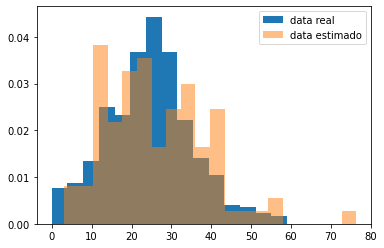

In [8]:
dist = 'beta'
params1 = getattr(st, dist).fit(hd)

random_hat1 = getattr(st, dist).rvs(*params1, size = 100)

plt.hist(hd, bins =15, label = 'data real', density = True)
plt.hist(random_hat1, bins = 20, density = True, alpha = .5, label = 'data estimado')
plt.legend()
plt.show()

Ahora haremos una prueba **Cuantil-Cuantil** 

No handles with labels found to put in legend.


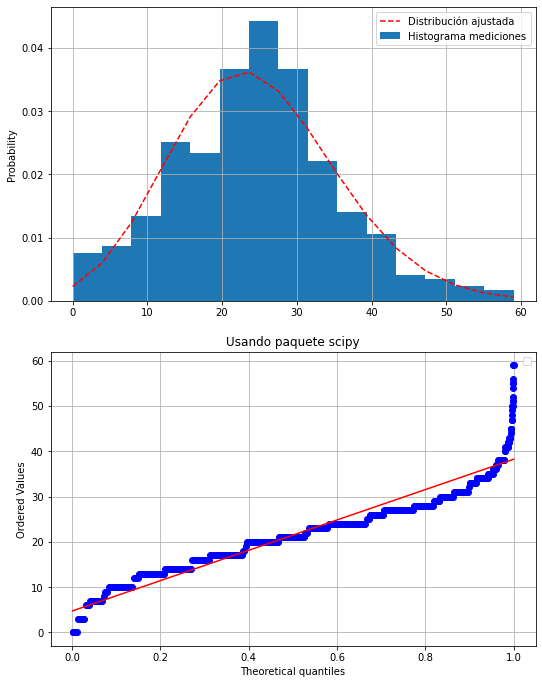

In [9]:
divisiones = 15
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(hd, divisiones, density=True, label='Histograma mediciones')

params = getattr(st, dist).fit(hd)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(hd, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

Con la prueba Q-Q, vemos que al distribución beta no se ajusta la distibución a los datos.

### Buscando distribución óptima para nodo 2 (ad)

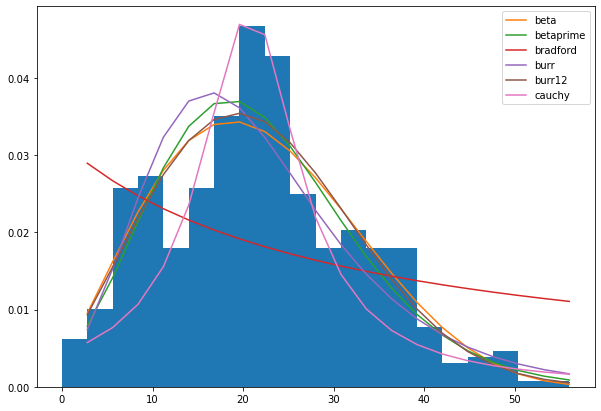

,distribución,error
0,beta,0.000038
1,betaprime,0.000041
2,bradford,0.000158
3,burr,0.000059
4,burr12,0.000037
5,cauchy,0.000057


In [10]:
#Buscando distribuciones para ad
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(ad, bins = 20, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(ad)
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

Vemos que la distibución beta es la que tiene el menor error. Para comprobar que esa distribución se ajusta a nuestros datos, haremos una prueba de hipótesis utilizando una prueba de Kolmogorov-Smirnov.

**Distribución beta**

**Formulación de hipótesis**

$H_{0}$: Nuestro conjunto de datos tienen una distribución beta.

$H_{a}$: Nuestro conjunto de datos no sigue una distribución beta.

**Plan de análisis.**

Para este análisis nuestro nivel de significancia  es 5%.

Por lo tanto nuestro nivel de confianza es del 95%.

${\alpha} = 0.05$

$1-{\alpha} = 0.95$

In [11]:
#Parámetros de distibución beta en nuestros datos
params_ad = st.beta.fit(ad)
params_ad

(3.1796817550672234, 5.580273290928247, -4.162135599635767, 70.99915466300375)

In [12]:
# Prueba de hipótesis
st.kstest(ad, lambda ad: st.beta.cdf(ad,*params_ad))

KstestResult(statistic=0.057507537881751225, pvalue=0.09236444844820679)

Observando nuestro "p-value", vemos que al ser considereablemente grande, podemos aceptar la hipótesis nula, de manera que podemos decir que estadísticamente la cantidad de puntos por juego de visitante, sí se distribuye como beta. 

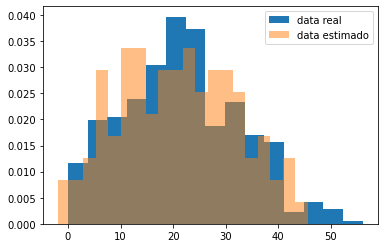

In [13]:
params2 = getattr(st, dist).fit(ad)

random_hat2 = getattr(st, dist).rvs(*params2, size = 100)

plt.hist(ad, bins =15, label = 'data real', density = True)
plt.hist(random_hat2, bins = 20, density = True, alpha = .5, label = 'data estimado')
plt.legend()
plt.show()

Ahora haremos una prueba **Cuantil-Cuantil** 

No handles with labels found to put in legend.


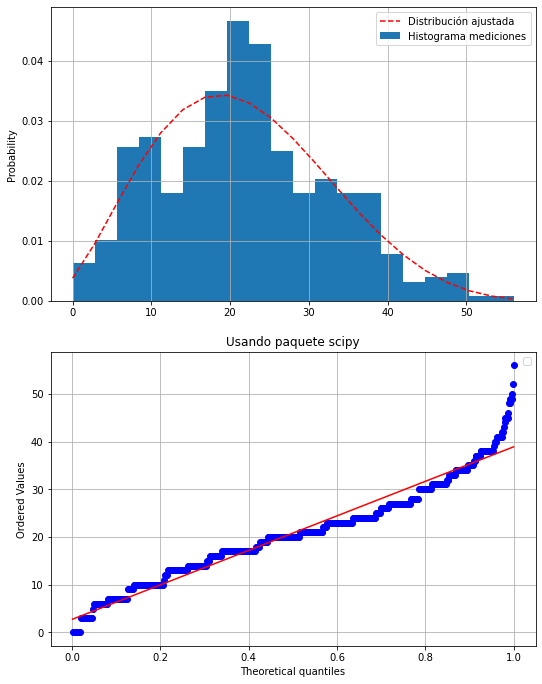

In [14]:
divisiones = 20
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(ad, divisiones, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(ad)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(ad, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

Con la prueba Q-Q, vemos que al distribución beta no se ajusta la distibución a los datos.

### Buscando distribución óptima para nodo 3 (ww)

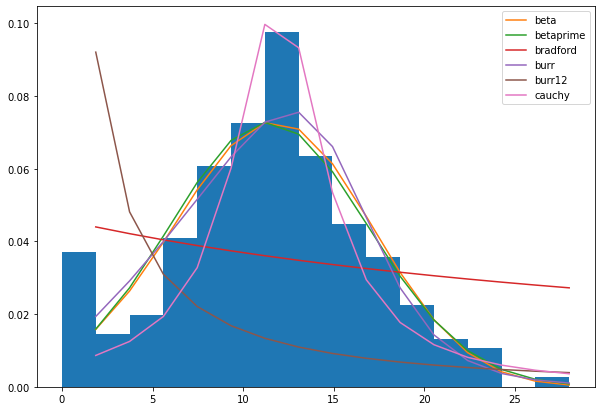

,distribución,error
0,beta,0.000134
1,betaprime,0.000151
2,bradford,0.000678
3,burr,0.000118
4,burr12,0.001541
5,cauchy,0.000165


In [15]:
#Buscando distribuciones para ww
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(ww, bins = 15, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(ww)
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

Vemos que la distibución beta es la que tiene el menor error. Para comprobar que esa distribución se ajusta a nuestros datos, haremos una prueba de hipótesis utilizando una prueba de Kolmogorov-Smirnov.

**Distribución beta**

**Formulación de hipótesis**

$H_{0}$: Nuestro conjunto de datos tienen una distribución beta.

$H_{a}$: Nuestro conjunto de datos no sigue una distribución beta.

**Plan de análisis.**

Para este análisis nuestro nivel de significancia  es 5%.

Por lo tanto nuestro nivel de confianza es del 95%.

${\alpha} = 0.05$

$1-{\alpha} = 0.95$

In [16]:
#Parámetros de distibución beta en nuestros datos
params_ww = st.beta.fit(ww)
params_ww

(1507234.6193003117, 316.653591312012, -463644.7694544712, 463753.61698696064)

In [17]:
# Prueba de hipótesis
st.kstest(ww, lambda ww: st.beta.cdf(ww,*params_ww))

KstestResult(statistic=0.08375146309611403, pvalue=0.006318999272340104)

Observando nuestro "p-value", vemos que al ser considereablemente grande, podemos aceptar la hipótesis nula, de manera que podemos decir que estadísticamente la cantidad de puntos por juego de visitante, sí se distribuye como beta.

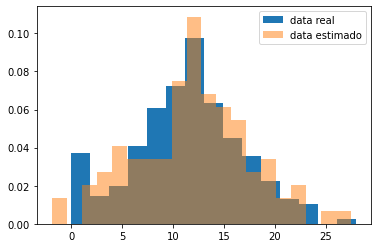

In [18]:
params3 = getattr(st, dist).fit(ww)

random_hat3 = getattr(st, dist).rvs(*params3, size = 100)

plt.hist(ww, bins =15, label = 'data real', density = True)
plt.hist(random_hat3, bins = 20, density = True, alpha = .5, label = 'data estimado')
plt.legend()
plt.show()

Ahora haremos una prueba **Cuantil-Cuantil** 

No handles with labels found to put in legend.


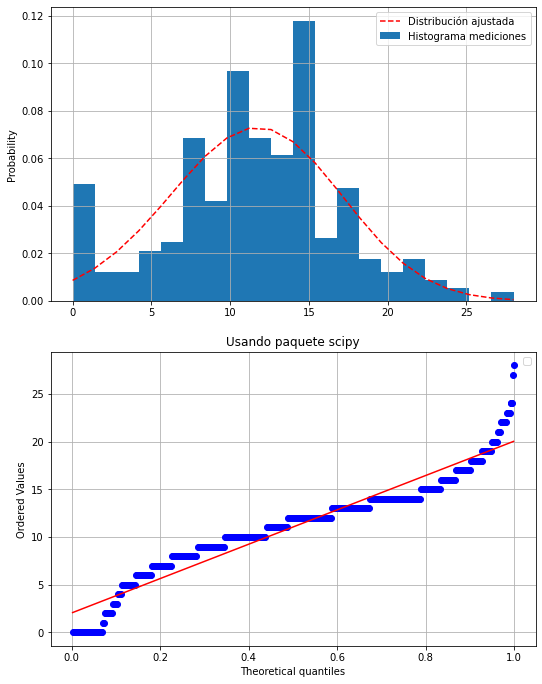

In [19]:
divisiones = 20
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(ww, divisiones, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(ww)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(ww, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

Con la prueba Q-Q, vemos que al distribución beta no se ajusta la distibución a los datos.

### Buscando distribución óptima para nodo 4 (pop)

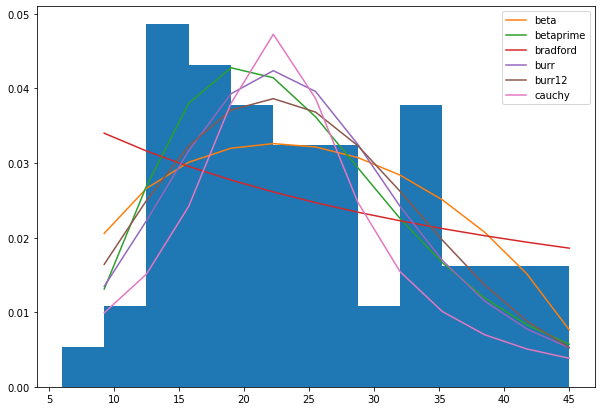

,distribución,error
0,beta,0.000128
1,betaprime,0.000104
2,bradford,0.000214
3,burr,0.000117
4,burr12,0.000116
5,cauchy,0.000166


In [20]:
#Buscando distribuciones para pop
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(pop, bins = 12, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(pop)
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

Vemos que la distibución beta es la que tiene el menor error. Para comprobar que esa distribución se ajusta a nuestros datos, haremos una prueba de hipótesis utilizando una prueba de Kolmogorov-Smirnov.

**Distribución beta**

**Formulación de hipótesis**

$H_{0}$: Nuestro conjunto de datos tienen una distribución beta.

$H_{a}$: Nuestro conjunto de datos no sigue una distribución beta.

**Plan de análisis.**

Para este análisis nuestro nivel de significancia  es 5%.

Por lo tanto nuestro nivel de confianza es del 95%.

${\alpha} = 0.05$

$1-{\alpha} = 0.95$

In [21]:
#Parámetros de distibución beta en nuestros datos
params_pop = st.beta.fit(pop)
params_pop

(1.5195125942284768, 1.7537416872688807, 5.512981982062131, 41.48519243283444)

In [22]:
# Prueba de hipótesis
st.kstest(pop, lambda pop: st.beta.cdf(pop,*params_pop))

KstestResult(statistic=0.09311917791349017, pvalue=0.6714124387468838)

Observando nuestro "p-value", vemos que al ser considereablemente grande, podemos aceptar la hipótesis nula, de manera que podemos decir que estadísticamente la cantidad de puntos por juego en play offs, sí se distribuye como beta.

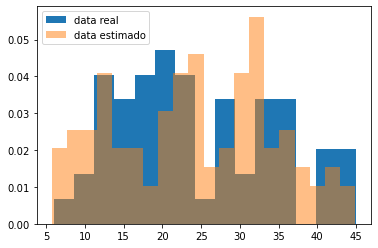

In [23]:
params4 = getattr(st, dist).fit(pop)

random_hat4 = getattr(st, dist).rvs(*params4, size = 100)

plt.hist(pop, bins =15, label = 'data real', density = True)
plt.hist(random_hat4, bins = 20, density = True, alpha = .5, label = 'data estimado')
plt.legend()
plt.show()

Ahora haremos una prueba **Cuantil-Cuantil** 

No handles with labels found to put in legend.


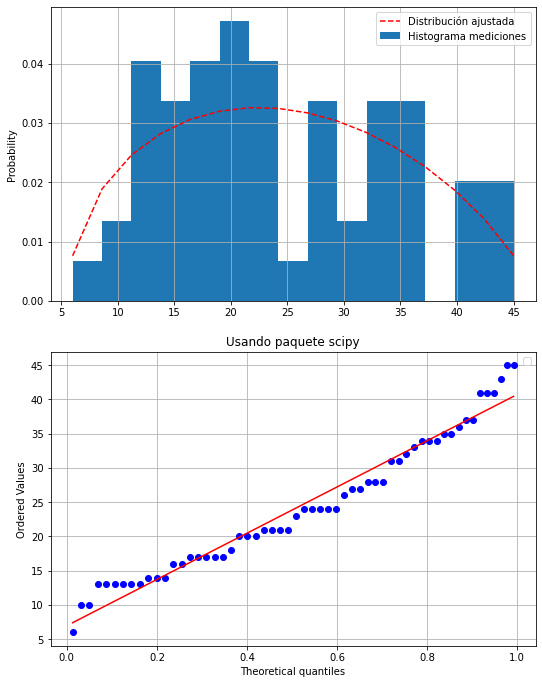

In [24]:
divisiones = 15
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(pop, divisiones, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(pop)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(pop, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

Con la prueba Q-Q, vemos que al distribución beta no se ajusta la distibución a los datos.

### Optimizacion del bandwidht

In [25]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) 
grid.fit(hd[:, None])
print(grid.best_params_)

{'bandwidth': 0.16206896551724137}


In [26]:
sns.histplot(data=hd, stat='density', kde=True, kde_kws={'bw_method': 0.16206896551724137}, color='r', bins=15)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [ ]:
grid1 = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) 
grid1.fit(ad[:, None])
print(grid1.best_params_)

In [27]:
sns.histplot(data=ad, stat='density', kde=True, kde_kws={'bw_method': 0.25517241379310346}, color='r', bins=20)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [28]:
grid2 = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.0001, 1.0, 30)},
                    cv=20) 
grid2.fit(ww[:, None])
print(grid2.best_params_)

{'bandwidth': 0.06905862068965518}


In [29]:
sns.histplot(data=ww, stat='density', kde=True, kde_kws={'bw_method': 0.06905862068965518}, color='r', bins=20)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [30]:
grid3 = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 4, 30)},
                    cv=20) 
grid3.fit(pop[:, None])
print(grid3.best_params_)

{'bandwidth': 3.7310344827586204}


In [31]:
sns.histplot(data=pop, stat='density', kde=True, kde_kws={'bw_method':  3.7310344827586204}, color='r', bins=10)

AttributeError: module 'seaborn' has no attribute 'histplot'

### Funciones para la simulación

In [32]:
def kde_statsmodels_m2(x, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  
                          var_type='c', **kwargs)
    return lambda x_i: kde.pdf(x_i)

def kde_statsmodels_u(x, bandwidth=0.06905862068965518, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return lambda x_i: kde.evaluate(x_i)

def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x



In [76]:
f1 = kde_statsmodels_m2(hd.values)
f2 = kde_statsmodels_m2(ad.values)
f3 = kde_statsmodels_m2(ww.values)
f4 = kde_statsmodels_m2(pop.values)

### NODO 1: Puntos como local.

(array([0.00758047, 0.0087467 , 0.0134116 , 0.02507386, 0.02332452,
        0.03673612, 0.04431659, 0.03673612, 0.0221583 , 0.01399471,
        0.01049603, 0.00408179, 0.00349868, 0.00233245, 0.00174934]),
 array([ 0.        ,  3.93333333,  7.86666667, 11.8       , 15.73333333,
        19.66666667, 23.6       , 27.53333333, 31.46666667, 35.4       ,
        39.33333333, 43.26666667, 47.2       , 51.13333333, 55.06666667,
        59.        ]),
 <a list of 15 Patch objects>)

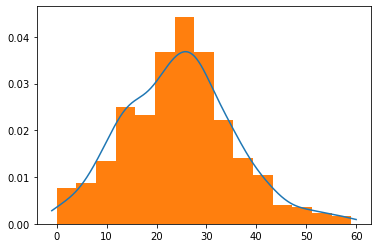

In [34]:
x_grid = np.linspace(-1, 60, 1000)
plt.plot(x_grid, f1(x_grid))
plt.hist(hd.values, bins=15, density=True)

El máximo de f es: 0.036837883368448246


(array([0.00459325, 0.00612433, 0.01148312, 0.0168419 , 0.02373177,
        0.02143515, 0.02679394, 0.03368381, 0.04516692, 0.03521489,
        0.03598043, 0.03368381, 0.03904259, 0.03291826, 0.02755948,
        0.01990407, 0.01454528, 0.01148312, 0.00612433, 0.00382771]),
 array([ 2.00396101,  4.22550132,  6.44704164,  8.66858195, 10.89012226,
        13.11166257, 15.33320288, 17.5547432 , 19.77628351, 21.99782382,
        24.21936413, 26.44090445, 28.66244476, 30.88398507, 33.10552538,
        35.32706569, 37.54860601, 39.77014632, 41.99168663, 44.21322694,
        46.43476725]),
 <a list of 20 Patch objects>)

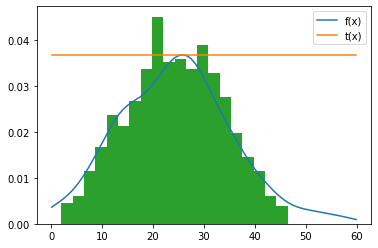

In [35]:
N = 100000
x = np.arange(.1,60,0.1)


def nodo1(N):
    R2 = np.random.uniform(.1, 60, N)
    R1 =np.random.uniform(.1, 60, N)
    R2_C = 60-R2+.1
    R1_C = 60-R2+.1

    R1F = np.concatenate([R1, R1_C])
    R2F = np.concatenate([R2, R2_C])
    
    VA1 = Acep_rechazo3(R2F, R1F, f1, t)
    
    return VA1


max_f = f1(optimize.fmin(lambda x:-f1(x), 0, disp=False))

t = lambda x: max_f * np.ones(len(x))

print('El máximo de f es:',max_f)

plt.plot(x,f1(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.hist(nodo1(N), bins=20, density=True)

In [36]:
sim1 = [nodo1(10000) for i in range(100)]
xs = np.concatenate(sim1)
np.mean(xs)

23.86473550662385

In [37]:
confianza = 0.95
i2 = st.norm.interval(confianza, loc=np.mean(xs), scale=st.sem(xs))
i2

(23.627715783472624, 24.101755229775073)

**Todas las veces que los Patriotas de Nueva Inglaterra llegaron al Superbowl, promediaron 28 puntos de local. En esta temporada promediarian 23. Con un intervalo de confianza muy pequeño, podemos concluir sobre este nodo que no alcanzaran el puntaje requerido como local en cada juego para poder aspirar al Superbowl**

### NODO 2: Puntos como visitante.

(array([0.00622471, 0.01011516, 0.02567694, 0.02723312, 0.01789605,
        0.02567694, 0.03501401, 0.04668534, 0.0427949 , 0.02489885,
        0.01789605, 0.02023031, 0.01789605, 0.01789605, 0.00778089,
        0.00311236, 0.00389045, 0.00466853, 0.00077809, 0.00077809]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ,
        30.8, 33.6, 36.4, 39.2, 42. , 44.8, 47.6, 50.4, 53.2, 56. ]),
 <a list of 20 Patch objects>)

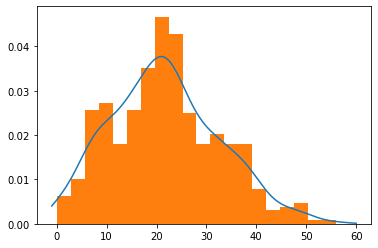

In [38]:
plt.plot(x_grid, f2(x_grid))
plt.hist(ad.values, bins=20, density=True)

El máximo de f2 es: 0.0377162192180095


(array([0.05457733, 0.00940988, 0.01505582, 0.01505582, 0.01756512,
        0.0219564 , 0.02572035, 0.03324826, 0.04767675, 0.03763954,
        0.03889419, 0.02885698, 0.02509303, 0.01693779, 0.0219564 ,
        0.01380116, 0.01003721, 0.00501861, 0.00501861, 0.0025093 ]),
 array([ 0.10020758,  2.34221656,  4.58422553,  6.82623451,  9.06824349,
        11.31025247, 13.55226145, 15.79427042, 18.0362794 , 20.27828838,
        22.52029736, 24.76230634, 27.00431531, 29.24632429, 31.48833327,
        33.73034225, 35.97235123, 38.2143602 , 40.45636918, 42.69837816,
        44.94038714]),
 <a list of 20 Patch objects>)

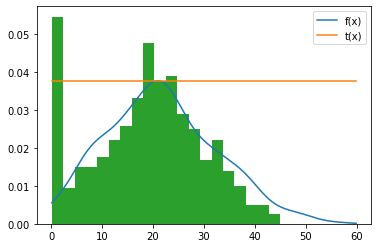

In [39]:
def nodo2(N):
    R2 = np.random.uniform(.1, 60, N)
    R1 =np.random.uniform(.1, 60, N)
    R2_C = 60-R2+.1
    R1_C = 60-R2+.1

    R1F = np.concatenate([R1, R1_C])
    R2F = np.concatenate([R2, R2_C])
    
    VA2 = Acep_rechazo3(R2F, R1F, f2, t2)
    
    return VA2

max_f2 = f2(optimize.fmin(lambda x:-f2(x), 0, disp=False))

t2 = lambda x: max_f2 * np.ones(len(x))

print('El máximo de f2 es:',max_f2)

plt.plot(x,f2(x),label='f(x)')
plt.plot(x,t2(x),label='t(x)')
plt.legend()


plt.hist(nodo2(N), bins=20, density=True)

In [40]:
sim2 = [nodo2(10000) for i in range(100)]
xs2 = np.concatenate(sim2)
np.mean(xs2)

18.359284503145552

In [41]:
i3 = st.norm.interval(confianza, loc=np.mean(xs2), scale=st.sem(xs2))
i3

(18.091459555545715, 18.62710945074539)

**Todas las veces que los Patriotas de Nueva Inglaterra llegaron al superbowl, promediaron 26 puntos de vistante. En esta temporada promediarian 18. Con un intervalo de confianza de +-1 punto, podemos concluir sobre este nodo que no alcanzarán el puntaje requerido como visitante para poder aspirar al Superbowl. Como vemos, aquí la diferencia de puntos es muy grande con respecto a los puntos de local, esto es porque para el equipo, las últimas temporadas jugando como visitante han sido malas.**

### Nodo 3: Viento en MPH

(array([0.04926108, 0.01231527, 0.01231527, 0.02111189, 0.02463054,
        0.06861365, 0.04222379, 0.09676284, 0.06861365, 0.06157635,
        0.11787474, 0.02638987, 0.04750176, 0.01759324, 0.01231527,
        0.01759324, 0.00879662, 0.00527797, 0.        , 0.00351865]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ,
        15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <a list of 20 Patch objects>)

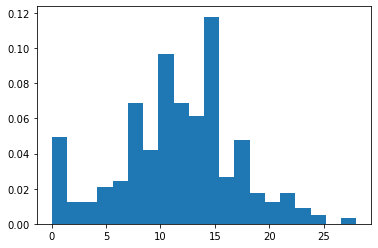

In [42]:
x_grid2 = np.linspace(5, 26, 1000)
#plt.plot(x_grid2, f3(x_grid2))
plt.hist(ww.values, bins=20, density=True)

El máximo de f2 es: 0.36378875989887666


(array([0.44940604, 0.00790164, 0.00493853, 0.00691394, 0.0177787 ,
        0.02963117, 0.01382788, 0.02963117, 0.03061887, 0.03753281,
        0.03061887, 0.00790164, 0.02568035, 0.00493853, 0.00197541,
        0.00790164, 0.00296312, 0.00098771, 0.        , 0.00296312]),
 array([6.94364655e-05, 1.40041168e+00, 2.80075393e+00, 4.20109618e+00,
        5.60143843e+00, 7.00178068e+00, 8.40212293e+00, 9.80246518e+00,
        1.12028074e+01, 1.26031497e+01, 1.40034919e+01, 1.54038342e+01,
        1.68041764e+01, 1.82045187e+01, 1.96048609e+01, 2.10052032e+01,
        2.24055454e+01, 2.38058877e+01, 2.52062299e+01, 2.66065722e+01,
        2.80069144e+01]),
 <a list of 20 Patch objects>)

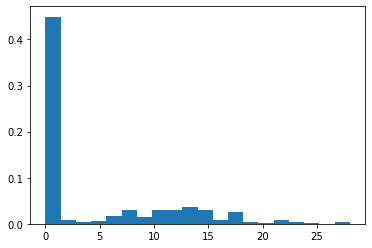

In [77]:
x = np.arange(4,30,0.1)

def nodo3(N):
    R2 = np.random.uniform(0, 30, N)
    R1 =np.random.uniform(0, 30, N)
    R2_C = 30-R2
    R1_C = 30-R2

    R1F = np.concatenate([R1, R1_C])
    R2F = np.concatenate([R2, R2_C])
    
    VA3 = Acep_rechazo3(R2F, R1F, f3, t3)
    
    return VA3


max_f3 = f3(optimize.fmin(lambda x:-f3(x), 0, disp=False))

t3 = lambda x: max_f3 * np.ones(len(x))

print('El máximo de f2 es:',max_f3)

#plt.plot(x,f3(x),label='f(x)')
#plt.plot(x,t3(x),label='t(x)')
#plt.legend()


plt.hist(nodo3(N), bins=20, density=True)

In [78]:
sim3 = [nodo3(10000) for i in range(100)]
xs3 = np.concatenate(sim3)
np.mean(xs3)

4.7345741910168675

In [79]:
i4 = st.norm.interval(confianza, loc=np.mean(xs3), scale=st.sem(xs3))
i4

(4.58431158671319, 4.884836795320545)

**Siempre que juegan de locales hacen un viento de 10 mph, mientras se estima que habrá 11 mph de viento, por lo cual, no va afectar mucho al resultado en puntos. Lo que es verdad, es que va en linea con lo que nos dice nuestra correlación, entre más viento, menos puntos de local.**

### Nodo 4: Puntos en los Play Offs

(array([0.00449843, 0.0359874 , 0.04498426, 0.0359874 , 0.02699055,
        0.02699055, 0.0179937 , 0.0359874 , 0.01349528, 0.01349528]),
 array([ 6. ,  9.9, 13.8, 17.7, 21.6, 25.5, 29.4, 33.3, 37.2, 41.1, 45. ]),
 <a list of 10 Patch objects>)

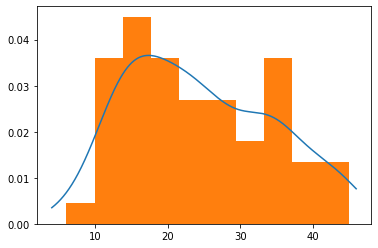

In [63]:
x_grid3 = np.linspace(4, 46, 1000)
plt.plot(x_grid3, f4(x_grid3))
plt.hist(pop.values, bins=10, density=True)

El máximo de f2 es: 0.03657846458708598


(array([0.0071312 , 0.01473781, 0.02424608, 0.03708224, 0.03375435,
        0.04136096, 0.02662315, 0.04516427, 0.03755765, 0.02804939,
        0.03042645, 0.02662315, 0.02662315, 0.0213936 , 0.02567232,
        0.01901653, 0.01949195, 0.01663947, 0.00998368, 0.00665579]),
 array([ 5.70237291,  7.70946526,  9.71655761, 11.72364995, 13.7307423 ,
        15.73783465, 17.744927  , 19.75201935, 21.7591117 , 23.76620405,
        25.7732964 , 27.78038874, 29.78748109, 31.79457344, 33.80166579,
        35.80875814, 37.81585049, 39.82294284, 41.83003519, 43.83712753,
        45.84421988]),
 <a list of 20 Patch objects>)

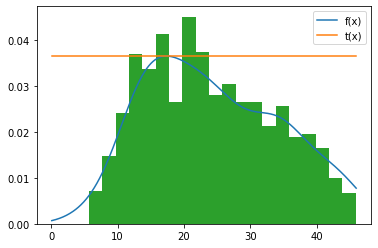

In [64]:
x = np.arange(.1,46,0.1)

def nodo4(N):
    R2 = np.random.uniform(.1, 46, N)
    R1 =np.random.uniform(.1, 46, N)
    R2_C = 46-R2+.1
    R1_C = 46-R2+.1

    R1F = np.concatenate([R1, R1_C])
    R2F = np.concatenate([R2, R2_C])
    
    VA4 = Acep_rechazo3(R2F, R1F, f4, t4)
    
    return VA4


max_f4 = f4(optimize.fmin(lambda x:-f4(x), 0, disp=False))

t4 = lambda x: max_f4 * np.ones(len(x))

print('El máximo de f2 es:',max_f4)

plt.plot(x,f4(x),label='f(x)')
plt.plot(x,t4(x),label='t(x)')
plt.legend()

plt.hist(nodo4(N), bins=20, density=True)

In [68]:
sim4 = [nodo4(10000) for i in range(100)]
xs4 = np.concatenate(sim4)
np.mean(xs4)

24.102321819486495

In [66]:
i5 = st.norm.interval(confianza, loc=np.mean(xs4), scale=st.sem(xs4))
i5

(23.694096436528046, 24.055666797732602)

**Cada vez que los Patriotas llegaron a los play offs, promediaron 29 puntos para llegar al superbowl, está temporada promediaran 23, por lo tanto, no llegarán. Con los resultados anteriores, podíamos darnos cuenta que la temporada no encamiba al superbowl, pero si les alcanzaba para llegar a los play offs, únicamente que sería hasta la post temporada a donde llegarían**

### Conclusiones Generales: 

**El equipo no va a generar lo suficente como para que se cumpla el objetivo principal que es llegar al superbowl. Si al menos existiera una compensación en los puntos hechos en casa para ganar más partidos y que las visitas no afecten a los puntos a lo largo de la temporada,a pesar de esto, el problema princiapl del equipo va a radicar en la post temporada donde es muy probable que caigan y no cumplan la meta de ganar el campeonato**